# Подсчет pi с использованием метода Монте-Карло

## Формулы
- square area: $s = (2 r)^2$
- circle area: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

## Изображение для визуализации концепции

![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

In [1]:
# Импорт необходимых модулей

import random
import matplotlib.pyplot as plt

In [2]:
# Инициализация количества "бросков"

num_points = 1500

In [3]:
# Здесь мы "бросаем дротики" и подсчитываем количество попаданий

points = []
hits = 0
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
        hits += 1
        points.append((x, y, "yellow"))
    else:
        points.append((x, y, "purple"))

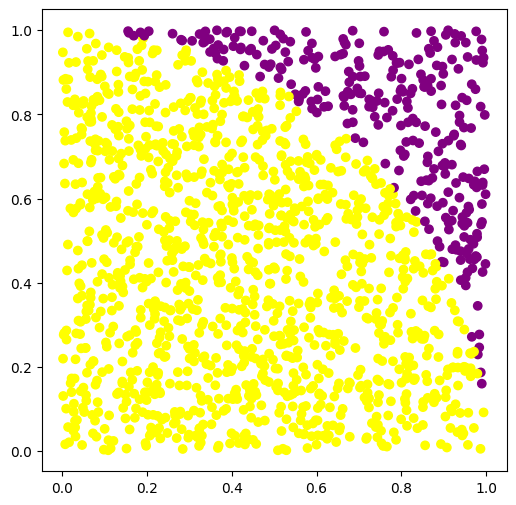

In [4]:
# Распакуем точки в 3 списка

x, y, colors = zip(*points)

# Определяем размеры фигуры

fig, ax = plt.subplots()
fig.set_size_inches(6.0, 6.0)

# Рисуем результат
ax.scatter(x, y, c=colors)

In [5]:
# Считаем оценку

fraction = hits / num_points
4 * fraction

3.2346666666666666

In [6]:
import random
from ipywidgets import interact, widgets

%matplotlib inline
from matplotlib import pyplot

def throw_darts(num_points):
    points = []
    hits = 0
    for _ in range(num_points):
        x, y = random.random(), random.random()
        if x*x + y*y < 1.0:
            hits += 1
            points.append((x, y, True))
        else:
            points.append((x, y, False))
    fraction = hits / num_points
    pi = 4 * fraction
    return pi, points
    
def create_plot(points):
    x, y, colors = zip(*points)
    pyplot.scatter(x, y, c=colors)

def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)

approximation: 3.196


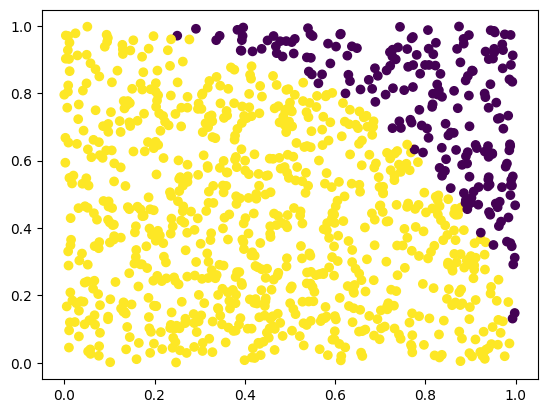

interactive(children=(IntSlider(value=1000, description='num_points', max=10000, min=100, step=100), Output())…

<function __main__.experiment(num_points)>

In [12]:
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100,
value=1000))

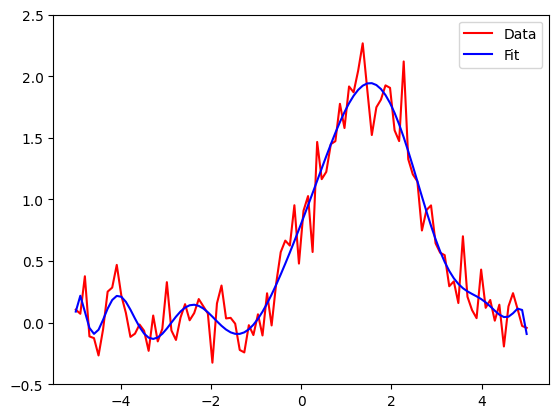

interactive(children=(IntSlider(value=16, description='n', max=30, min=3), Output()), _dom_classes=('widget-in…

In [14]:
import numpy as np

from ipywidgets import interact

import matplotlib.pyplot as plt
%matplotlib inline

def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)

def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y

def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit

def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()

x, y = noisy_gaussian()

@interact
def slider(n=(3, 30)):
    yfit = fit(x, y, n)
    plot(x, y, yfit)

114 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


0.11223372999993445

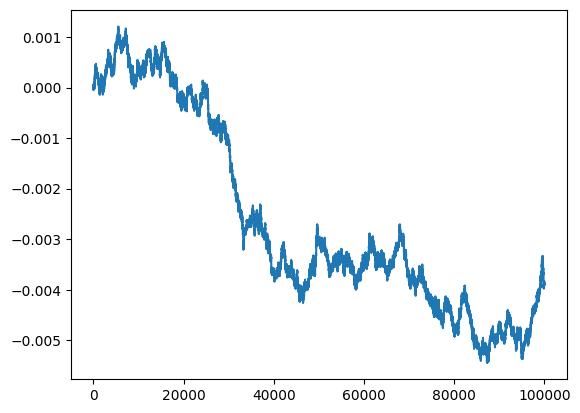

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def step():
    import random
    return 1. if random.random() > .5 else -1.

def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x
    
n = 100000
x = walk(n)

plt.plot(x)

t1 = %timeit -o walk(n)
t1.best

In [25]:
%%prun
walk(n)

         200123 function calls (200121 primitive calls) in 0.212 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.103    0.103    0.183    0.183 1015306324.py:8(walk)
    99999    0.074    0.000    0.100    0.000 1015306324.py:4(step)
    99999    0.026    0.000    0.026    0.000 {method 'random' of '_random.Random' objects}
        2    0.009    0.004    0.016    0.008 {method '__exit__' of 'sqlite3.Connection' objects}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.zeros}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        3    0.000    0.000    0.000    0.000 socket.py:621(send)
        1    0.000    0.000    0.183    0.183 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 traitlets.py:1542(notify_change)
        1    0.000    0.000    0.000    0.000 traitlets.py:1546(_notify_observers)
        1    0.000    0.000    0